# Exploratory Data Analysis

# 3. EDA on Items Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

print('imported library')

imported library


In [2]:
# reading dataset

url = '..\favorita-grocery-sales-forecasting'

items = pd.read_csv(os.path.join(url,"items.csv"))

train = pd.read_csv(os.path.join(url, "train.csv") , nrows=1000000 , parse_dates = ['date'] , index_col = 'id')


** dataset loaded **


In [3]:
items.head(7)

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1
5,105574,GROCERY I,1045,0
6,105575,GROCERY I,1045,0


In [4]:
# checking for missing values

items.isnull().any()

item_nbr      False
family        False
class         False
perishable    False
dtype: bool

In [5]:
items.isnull().values.any()  # False

False

# No of Items per each Family :

In [9]:
x =items.family.value_counts().to_frame()
x


,family
GROCERY I,1334
BEVERAGES,613
CLEANING,446
PRODUCE,306
DAIRY,242
PERSONAL CARE,153
BREAD/BAKERY,134
HOME CARE,108
DELI,91
MEATS,84


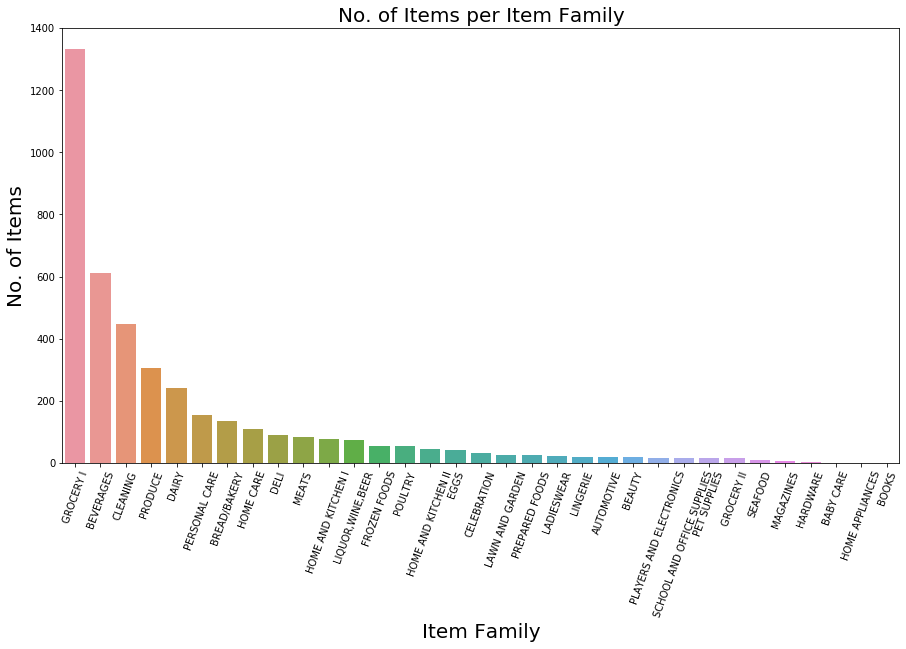

In [13]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x = x.index, y= x.family , data = x)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, fontsize = 10)
plt.ylabel('No. of Items', fontsize= 20)
plt.xlabel('Item Family', fontsize= 20)
plt.title('No. of Items per Item Family',fontsize= 20)
plt.show()

- Grocery I has the maximum no. of items followed by Beverages and Cleaning .
- Some of the Families such as Home Appliances, Baby Care, Books has almost no items.

In [19]:
# توی هر خانواده محصولات چطورن از نظر فاسد شدن

x = items.groupby(['family', 'perishable']).size().to_frame()
x


,,0
family,perishable,
AUTOMOTIVE,0,20
BABY CARE,0,1
BEAUTY,0,19
BEVERAGES,0,613
BOOKS,0,1
BREAD/BAKERY,1,134
CELEBRATION,0,31
CLEANING,0,446
DAIRY,1,242


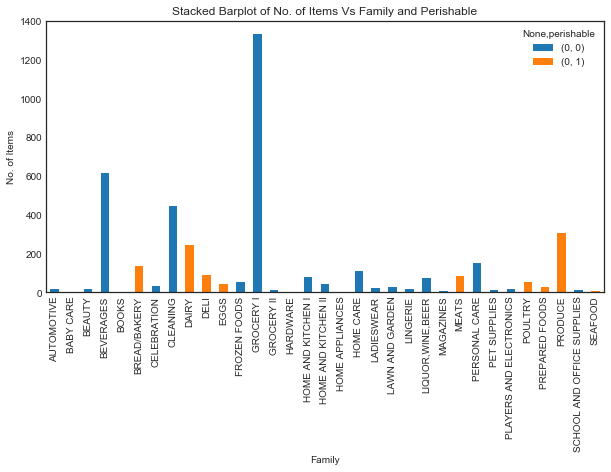

In [22]:
x.unstack().plot(kind='bar',stacked=True, figsize=(10,5),  grid=False)
plt.title('Stacked Barplot of No. of Items Vs Family and Perishable')
plt.xlabel('Family')
plt.ylabel('No. of Items')
plt.show()



- No family contains both perishable and non-perishable items

# Sales per Item Family

 Merging items dataframe and sales dataframe

In [25]:
df_item_sales = train.merge(items, how='inner', on='item_nbr')
df_item_sales.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable
0,2013-01-01,25,103665,7.0,NaN,BREAD/BAKERY,2712,1
1,2013-01-02,1,103665,2.0,NaN,BREAD/BAKERY,2712,1
2,2013-01-02,2,103665,5.0,NaN,BREAD/BAKERY,2712,1
3,2013-01-02,3,103665,6.0,NaN,BREAD/BAKERY,2712,1
4,2013-01-02,4,103665,2.0,NaN,BREAD/BAKERY,2712,1


In [27]:
x = df_item_sales.groupby(['family'], as_index=False).agg({'unit_sales':'sum'}) 
x.head()


,family,unit_sales
0,AUTOMOTIVE,5366.000
1,BEAUTY,3346.000
2,BEVERAGES,1401870.000
3,BREAD/BAKERY,457897.271
4,CLEANING,1216621.000


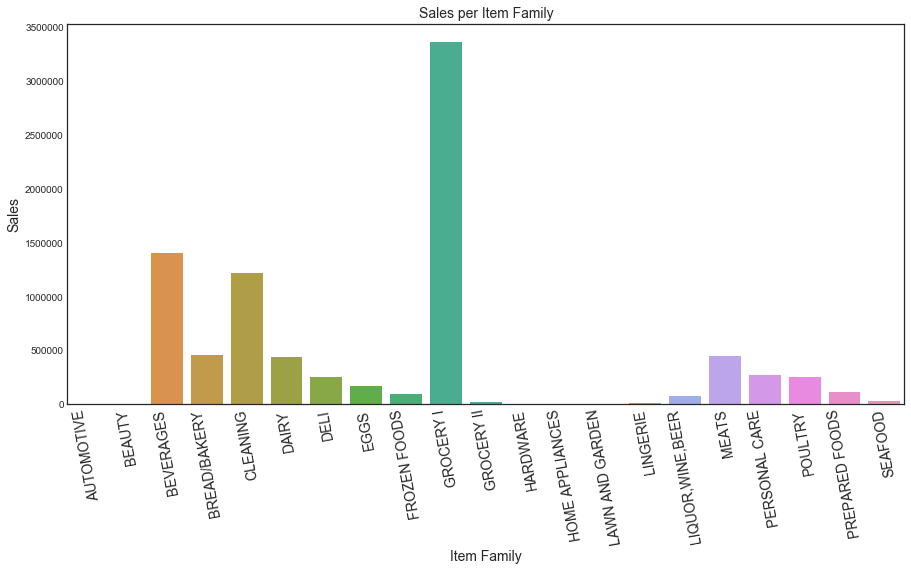

In [31]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x = x.family, y= x.unit_sales , data = x)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 100, fontsize = 14)
plt.ylabel('Sales', fontsize= 14)
plt.xlabel('Item Family', fontsize= 14)
plt.title('Sales per Item Family',fontsize= 14)
plt.show()

- GROCERY I is the best selling family
- Item family shows variation in sales number

# No. of Items per Item Class :

In [32]:
x = items['class'].value_counts().to_frame()
x.head()

,class
1016,133
1040,110
1124,100
1034,98
1122,81


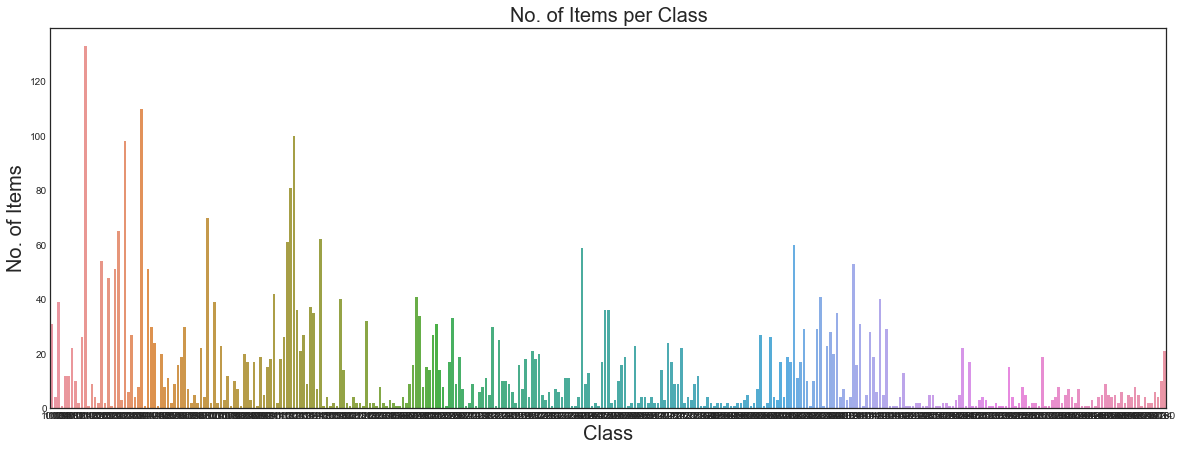

In [34]:
plt.figure(figsize=(20,7))
sns.barplot(x = x.index, y= "class", data = x)
plt.title('No. of Items per Class',fontsize= 20)
plt.xlabel('Class', fontsize= 20)
plt.ylabel('No. of Items', fontsize= 20)
plt.show()

- The class feature has a large number of levels
- Item class shows variation in no. of items

# Sales per Item Class :

In [35]:
x = df_item_sales.groupby(['class'], as_index=False).agg({'unit_sales':'sum'}) 
x.head()

,class,unit_sales
0,1002,36177.0
1,1003,8510.0
2,1004,199840.0
3,1006,2099.0
4,1008,8984.0


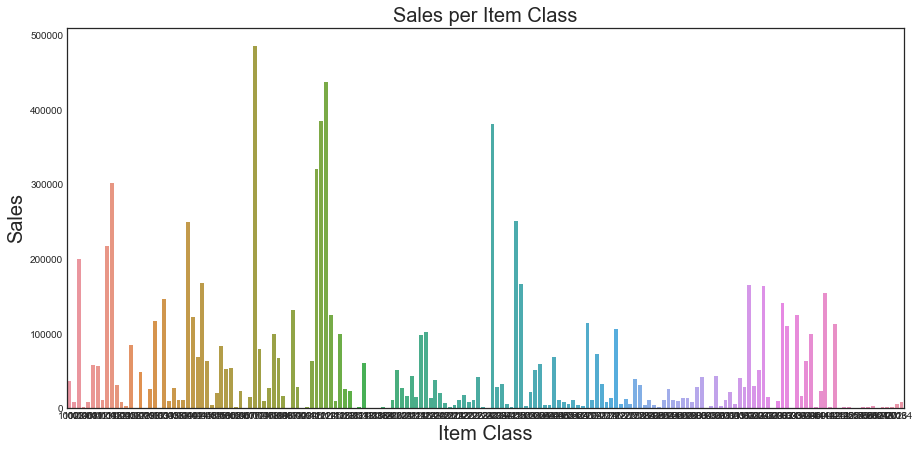

In [39]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x = x['class'], y=x["unit_sales"], data = x)
plt.ylabel('Sales', fontsize= 20)
plt.xlabel('Item Class', fontsize= 20)
plt.title('Sales per Item Class',fontsize= 20)
plt.show()

- Item class shows certain amount of variation in sale numbers.

# No. of Items Perishable/Non-Perishable :

In [43]:
x = items.perishable.value_counts().to_frame()
x.head()

,perishable
0,3114
1,986


C:\Users\SG\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


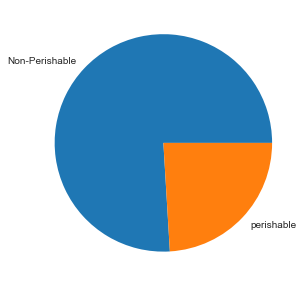

In [50]:
plt.figure(figsize=(10,5))
plt.pie(x=x , labels= ['Non-Perishable','perishable'])
plt.show()

- We can see that more non-perishable item exists in the dataset.


- About 1/4 of all items are perishable. 
This will have a impact our prediction models, because good predictions of perishable items are rewarded with a bonus
( i.e Items marked as perishable have a score weight of 1.25; otherwise, the weight is 1.0)

# Sales for Perishable/Non-Perishable Items :

In [51]:
x = df_item_sales.groupby(['perishable'], as_index=False).agg({'unit_sales':'sum'}) 
x.head()

,perishable,unit_sales
0,0,6480023.953
1,1,2156732.325


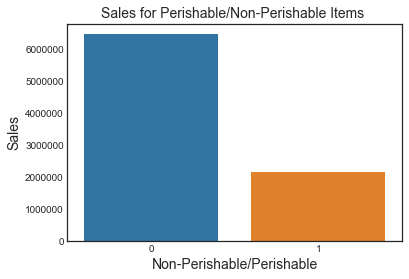

In [52]:
sns.barplot(x = x.perishable , y= x.unit_sales , data = x)
plt.ylabel('Sales', fontsize= 14)
plt.xlabel('Non-Perishable/Perishable', fontsize= 14)
plt.title('Sales for Perishable/Non-Perishable Items ',fontsize= 14)
plt.show()